## 随机事件与随机变量（6.22）
### 理论部分

**基本概念：** 随机事件，样本空间等；  
**概率基础：** 古典概型，条件概率，贝叶斯公式；  
**随机变量及其分布特征**  
### 练习部分：
- 做理论知识点的笔记；
- python实现二项分布，协方差和相关系数以及贝叶斯公式；

#### 理论知识点的笔记  


##### **随机实验$E$**满足以下三个条件: 

1. 可以在相同条件下重复进行；
2. 结果有多种可能性，并且所有可能结果事先已知；
3. 作一次试验究竟哪个结果出现，事先不能确定。

##### **贝叶斯公式**  
在实际中，常取对样本空间  $\Omega$ 的有限划分 $B_1,B_2,...,B_n$ 。  
- $B_i$ 视为导致试验结果 $A$ 发生的“原因”，而$P(B_i)$ 表示各种“原因”发生的可能性大小，故称为**先验**概率；
- $P(B_i|A)$ 则反应当试验产生了结果 $A$ 之后，再对各种“原因”概率的新认识，故称为**后验**概率 。

##### **协方差和相关系数**都是描述随机变量 $X$ 与随机变量 $Y$ 之间的**线性联系**程度的数字量。

- 计算公式 $Cov(X，Y) =E( XY) -E( X)E(Y) $ ;  $E( XY) $ 为 $X，Y$ 联合分布**乘积**的期望，相互独立时，有 $Cov(X，Y) = 0$;
     
- $\rho（X,Y） = \frac{Cov(X，Y)}{\sqrt {Var(X)} \sqrt {Var(Y)}}$
  为  $X,Y$ 的相关系数，它是无纲量的量（也就是说没有单位，只是个代数值）。

- 基本上我们都会用相关系数来衡量两个变量之间的相关程度。相关系数在-1到1之间，小于零表示负相关，大于零表示正相关。绝对值 $|\rho（X,Y）|$ 表示相关度的大小。越接近1，相关度越大。

#### python实现二项分布，协方差和相关系数以及贝叶斯公式；

In [85]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return (n*factorial(n-1))
    
# 二项分布
def Binomial(n,k,p):
    if n>=k and p>=0 and p<=1:
        Cnk = factorial(n)/factorial(k)/factorial(n-k)
        return Cnk*(p**k)*((1-p)**(n-k))
    else:
        return -1
    
print(Binomial(5,2,0.5))

0.3125


In [86]:
A = [1,2,1,3,4]
P = [.2,.2,.2,.2,.2]
B = [2,1,2,6,7]
AB= [a*b for a,b in zip(A,B)]
PQ= Q = P

#期望
def Exp(A,P):
    return sum(a*p for a,p in zip(A,P))
#标准差
from math import sqrt
def Std(A,P):
    E = Exp(A,P)
    Var = sum((a-E)**2*p for a,p in zip(A,P))
    return sqrt(Var)

#协方差 = 联合分布期望 - 单独期望乘积
#计算前提，已知XY联合分布
#Cov(A,B) = E(XY) - E(X)E(Y)
#AB 为A，B联合分布，PQ为AB分布率

def Cov(A,B,AB,P,Q,PQ):
    return Exp(AB,PQ)-Exp(A,P)*Exp(B,Q)
#相关系数
def rho(A,B,AB,P,Q,PQ):
    return Cov(A,B,AB,P,Q,PQ)/(Std(A,P)*Std(B,Q))
print(rho(A,B,AB,P,Q,PQ))

0.8799860814956723


In [87]:
#Bayes公式
# PAB:[P(A|Bi)],PB:[P(Bi)]
def Bayes(PAB,PB,i):
    if sum(p for p in PB)!=1:
        return -1
    base = sum(p*q for p,q in zip(PAB,PB))
    PBiA = PAB[i-1]*PB[i-1]/base
    return PBiA

PAB = [0.95,0.1]
PB  = [0.0004,1-0.0004]
print(Bayes(PAB,PB,1))

0.003787123779150887


## Task2：数理统计与描述性分析（6.24）
### 理论部分

- 统计量与抽样；常用统计量；  
- 数据集中与离散趋势的度量；  
- 分布特征，偏度与峰度；  
### 练习部分
- 做理论知识点的笔记；  
- python实现数据各维度的描述性分析；

### 理论知识点的笔记
#### 统计量与抽样
**总体的两重性：**  
- 在数理统计中，称研究对象的全体为**总体**，通常用一个随机变量表示总体。
- 数理统计学中的总体是指与总体相联系的某个(或某几个)数量指标 $X$ 取值的全体。比如，该批元件的使用寿命 $X$ 的取值全体就是研究对象的总体。显然 $X$ 是随机变量，这时，就称 $X$ 为总体。  

**样本的两重性：**
- 在一次具体地抽样后它是一组确定的数值。
- 在一般叙述中样本也是一组随机变量，因为抽样是随机、独立的。  

一般地，用 $X_1,X_2,...，X_n$ , 表示随机样本，它们取到的值记为 $x_1,x_2,...，x_n$ 称为样本观测值。样本作为随机变量，有一定的概率分布，这个概率分布称为样本分布。显然，样本分布取决于总体的性质和样本的性质。  

**简单随机样本：**  
$ x_1,x_2,...,x_n $ 相互独立，且每个 $x_i$ 与 $X$ 同分布，则称$ x_1,x_2,...,x_n $ 为，简称样本.通常把 $n$ 称为样本容量。

**统计推断：** 计算样本统计量，以反应总体的相关信息。


#### 常用统计量

- 样本均值
- 样本方差，系数修正为$1/(n-1)$
- $k$阶样本原点距，均值定义的扩充
- $k$阶样本中心距，方差定义的扩充
- 顺序统计量，样本按大小排序后的相对位置关系


#### 描述性统计

##### 数据集中趋势的度量
- 均值、中位数（或百分位数）、众数（频数最大的）

|        |                         优点                         |       缺点       |
| :----: | :--------------------------------------------------: | :--------------: |
|  均值  |              充分利用所有数据，适用性强              | 容易受极端值影响 |
| 中位数 |                    不受极端值影响                    |    缺乏敏感性    |
|  众数  | 不受极端值影响；当数据具有明显的集中趋势时，代表性好 |    缺乏唯一性    |

##### 数据离散趋势的度量

- 方差，标准差，极差（或四分位差）以及变异系数（标准差归一化）等。

##### 偏度与峰度

**偏度（skewness）：**样本的标准三阶中心矩。统计数据分布非对称程度的数字特征。直观看来就是密度函数曲线尾部的相对长度。**偏度刻画的是分布函数（数据）的对称性。**关于均值对称的数据【正态分布】其偏度系数为0，右侧更分散的数据偏度系数为正（有少数变量值很大，使曲线右侧尾部拖得很长），左侧更分散的数据偏度系数为负（有少数变量值很小，使曲线左侧尾部拖得很长）。

**峰度（kurtosis）：**样本的标准四阶中心矩。说明的是分布曲线在平均值处峰值高低的特征数。直观看来，峰度反映了峰部的尖度。样本的峰度是和【正态分布】相比较而言统计量，如果峰度大于3，峰的形状比较尖，比正态分布峰要陡峭。反之亦然。**峰度刻画的是分布函数的集中和分散程度。**


#### python实现数据各维度的描述性分析

In [133]:
import numpy as np
import pandas as pd
a = [1,2,4,5,3,12,12,23,43,52,11,22,22,22]
#a = [1,2,3]
a_mean = np.mean(a)  #均值
a_med  = np.median(a)  #中位数
print("a的平均数:",a_mean)
print("a的中位数:",a_med)

ser = pd.Series(a)
a_m = ser.mode()
print("a的众数:",a_m.values)


a的平均数: 16.714285714285715
a的中位数: 12.0
a的众数: [22]


In [134]:
#对pd.Series类型
ser.describe()

count    14.000000
mean     16.714286
std      15.409431
min       1.000000
25%       4.250000
50%      12.000000
75%      22.000000
max      52.000000
dtype: float64

In [135]:
#numpy计算方差时，使用的是原始系数1/n
a_var1 = np.var(a)  #方差  1/n
a_std1 = np.std(a)  #标准差1/n
a_mean1 = np.mean(a)  #均值
a_cv1  = 100*a_std1 /a_mean1 #变异系数

#pandas计算方差时，使用的是修正系数1/(n-1)
a_var2 = ser.var()  #方差  1/(n-1)
a_std2 = ser.std()  #标准差1/(n-1)
a_mean2 = ser.mean()
a_cv2  = 100*a_std2 /a_mean2 #变异系数

print("a的方差:",a_var1,a_var2)
print("a的标准差:",a_std1,a_std2)
print("a的变异系数:",a_cv1,a_cv2)

a的方差: 220.4897959183673 237.4505494505494
a的标准差: 14.848898811641464 15.409430536218702
a的变异系数: 88.83956553973525 92.19317414831701


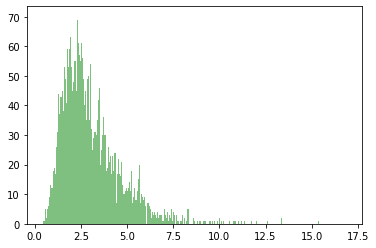

偏度系数 1.740618995808539
峰度系数 5.453029574013017


In [136]:
import matplotlib.pyplot as plt
import random
SAMPLE_SIZE = 10000
#生成对数正态分布
mu = 1
sigma = 0.5
data = [random.lognormvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)]

#生成标准正态分布的随机数
#data = list(np.random.randn(SAMPLE_SIZE))
plt.hist(data,1000,facecolor='g',alpha=0.5)
'''
plt.hist(arr, bins=10, facecolor, edgecolor,alpha，histtype='bar')
bins：直方图的柱数，可选项，默认为10
alpha: 透明度
'''
plt.show()
s = pd.Series(data) #将数组转化为序列
print('偏度系数',s.skew())
print('峰度系数',s.kurt())